## Assignment : 01

### <b> Note: </b>

### The IPython Notebook is released as a supplementary material for the students to run and validate the code locally. The students are not required to submit the IPython Notebook. The final assignment submission should be done via moodle.

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Basic Pandas operations

def read_data(file):

    """ This function reads a csv file and returns a pandas dataframe."""
    #file: path to csv file

    #Enter your code here:
    #-------------------------------------------#
    df = pd.read_csv(file)
    #-------------------------------------------#
    return df


def print_head(df, n=5):
    """ Print the first n rows of a dataframe
    """

    #df: dataframe
    #n: number of rows to print

    #Enter your code here:
    #-------------------------------------------#
    print(df.head(n))
    #-------------------------------------------#

    return


def column_names(df):
    """ Return the column names of a dataframe
    """
    #names: list of column names
    names = None

    #df: dataframe

    #Enter your code here:
    #-------------------------------------------#
    names = df.columns
    #-------------------------------------------#

    return names

In [3]:
file_location = "/mnt/data1/my_codes/my_notebooks/pandas/data/alcohol-consumption.csv"
df = pd.read_csv(file_location)

In [4]:
#print the first 5 rows of the dataframe
print_head(df=df, n=5)

#print the column names
print(column_names(df))

          country  total_consumption  recorded_consumption  \
0         Estonia               16.9                  15.8   
1       Lithuania               15.0                  13.8   
2  Czech Republic               14.3                  12.4   
3      Seychelles               13.8                  12.4   
4         Germany               13.4                  11.3   

   unrecorded_consumption  beer_percentage  wine_percentage  \
0                     1.1             32.7              7.4   
1                     1.2             43.6              7.3   
2                     1.4             53.3             21.3   
3                     1.4             68.9             22.4   
4                     1.4             52.6             28.4   

   spirits_percentage  other_percentage  2020_projection  2025_projection  
0                50.3               9.6             11.5             11.9  
1                37.1              12.1             14.4             13.9  
2                25.

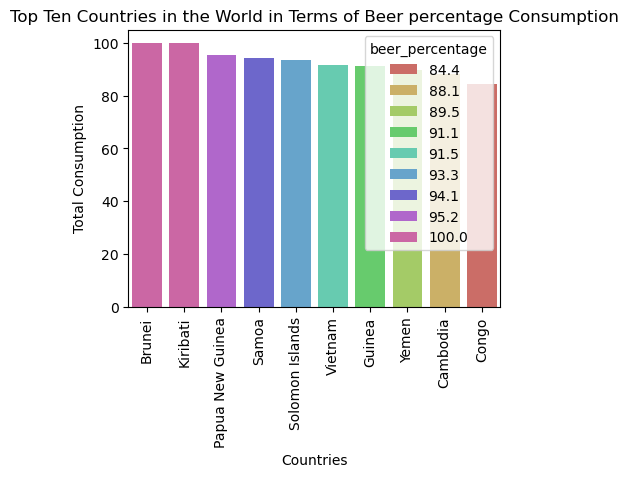

In [5]:
# plot the top ten countries in the world in terms of beer_percentage using bar plot (use sort_values() method to sort the dataframe)
# Your figure should have title, x-axis label, y-axis label, and x-axis labels should be rotated 90 degrees
# Following parameters may be used in sns.barplot(): hue='beer_percentage', palette='hls', width=0.8, dodge=False (Feel free to experiment with other parameters)

def plot_top_ten_countries(df):
    #parameters:
    #df: a pandas dataframe



    #Enter your code here:
    #---------------------------------------------------
    top_ten_countries = df.sort_values(by='beer_percentage', ascending=False).head(10)

    plt.figure(figsize=(4.8, 3.6))
    sns.barplot(x='country', 
                y='beer_percentage', 
                data=top_ten_countries, 
                hue='beer_percentage', 
                palette='hls',
                width=0.8,
                dodge=False)

    #rotate the x-axis labels
    plt.xticks(rotation=90)
    plt.xlabel('Countries')
    plt.ylabel('Total Consumption')
    plt.title('Top Ten Countries in the World in Terms of Beer percentage Consumption')
    plt.show()
    #---------------------------------------------------

    return

plot_top_ten_countries(df)

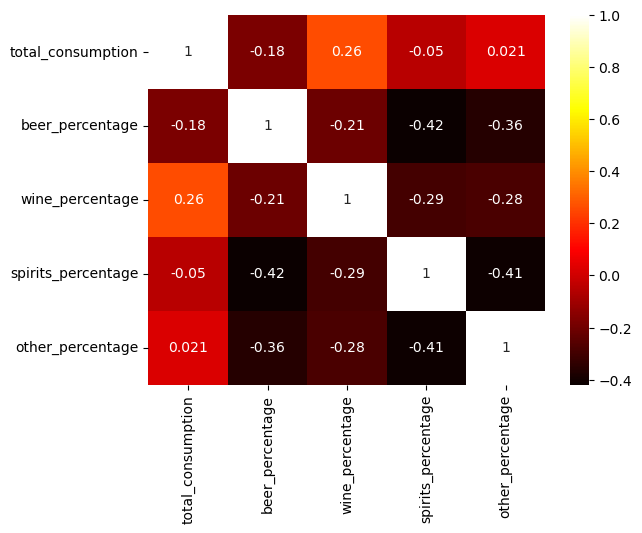

In [6]:
# what is the most correlated feature with the column 'total_consumption': 'beer_percentage', 'wine_percentage', 'spirits_percentage', or 'other_percentage'?
# Justify your answer with plots and/or statistics. (use correlation matrix in pandas and heatmap plot from seaborn)

def plot_correlation(df, columns):

    """ Plot the correlation matrix for a dataframe"""

    #parameters:
    #df: dataframe
    #columns: list of columns to plot

    #Enter your code here:
    #---------------------------------------------------
    #plot the correlation matrix
    corr = df[columns].corr()
    sns.heatmap(corr, annot=True, cmap='hot')
    plt.show()
    #---------------------------------------------------
    
    return

plot_correlation(df, ['total_consumption', 'beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage'])


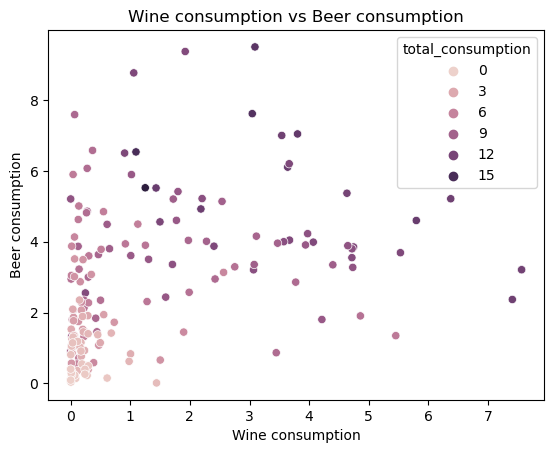

In [7]:
# create a new column called 'wine_consumption' derived from 'total_consumption' column and 'wine_percentage' column
# create a new column called 'beer_consumption' derived from 'total_consumption' column and 'beer_percentage' column
# plot a scatterplot with 'wine_consumption' on the x-axis and 'beer_consumption' on the y-axis
# set hue to 'total_consumption', title to 'Wine consumption vs Beer consumption', x-label to 'Wine consumption', y-label to 'Beer consumption'

def create_columns_and_plot(df):
    """ create a new column called 'wine_consumption' derived from 'total_consumption' column and 'wine_percentage' column
        create a new column called 'beer_consumption' derived from 'total_consumption' column and 'beer_percentage' column
        plot a scatterplot with 'wine_consumption' on the x-axis and 'beer_consumption' on the y-axis"""

    #Enter your code here
    #---------------------------------------------------------
    df['wine_consumption'] = df['total_consumption'] * df['wine_percentage'] / 100
    df['beer_consumption'] = df['total_consumption'] * df['beer_percentage'] / 100
    df["spirits_consumption"] = df["total_consumption"] * df["spirits_percentage"] / 100
    df["other_consumption"] = df["total_consumption"] * df["other_percentage"] / 100
    sns.scatterplot(x='wine_consumption', y='beer_consumption', data=df, hue='total_consumption')
    plt.xlabel('Wine consumption')
    plt.ylabel('Beer consumption')
    plt.title('Wine consumption vs Beer consumption')
    plt.show()
    #---------------------------------------------------------

    return df

df = create_columns_and_plot(df)

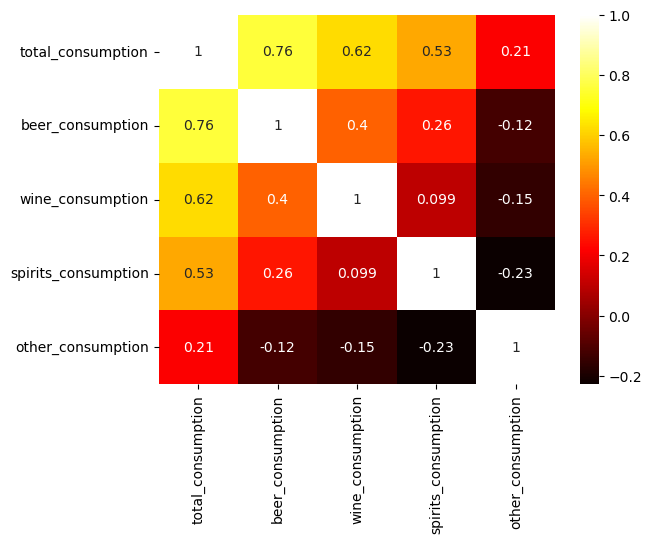

In [8]:
plot_correlation(df, ['total_consumption', 'beer_consumption', 'wine_consumption', 'spirits_consumption', 'other_consumption'])

In [9]:
df[['total_consumption', 'beer_consumption', 'wine_consumption', 'spirits_consumption', 'other_consumption', 'beer_percentage', 'wine_percentage', 'spirits_percentage', 'other_percentage']]

,total_consumption,beer_consumption,wine_consumption,spirits_consumption,other_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage
0,16.9,5.5263,1.2506,8.5007,1.6224,32.7,7.4,50.3,9.6
1,15.0,6.5400,1.0950,5.5650,1.8150,43.6,7.3,37.1,12.1
2,14.3,7.6219,3.0459,3.6322,0.0000,53.3,21.3,25.4,0.0
3,13.8,9.5082,3.0912,0.8694,0.3450,68.9,22.4,6.3,2.5
4,13.4,7.0484,3.8056,2.5326,0.0000,52.6,28.4,18.9,0.0
...,...,...,...,...,...,...,...,...,...
184,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


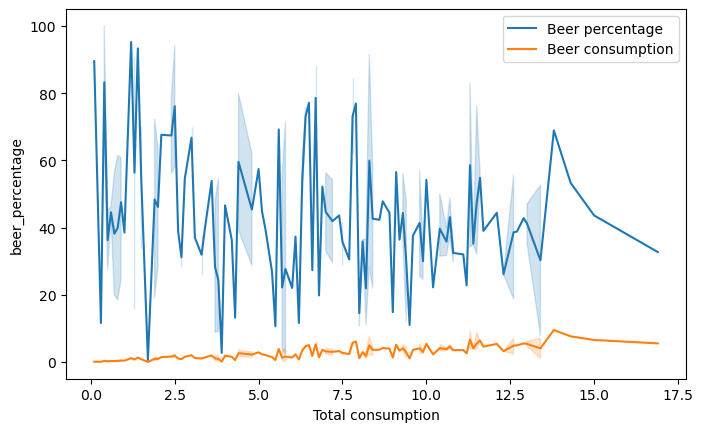

In [10]:
#line plot of 'total_consumption' column versus 'beer_percentage' column and 'beer_consumption' column
#set x-label to 'Total consumption', y-label to 'Beer percentage', title to 'Total consumption vs Beer percentage'

fig, ax = plt.subplots(figsize=(8, 4.8))
sns.lineplot(x='total_consumption', y='beer_percentage', data=df, label='Beer percentage')
sns.lineplot(x='total_consumption', y='beer_consumption', data=df, label='Beer consumption')
plt.xlabel('Total consumption')
plt.show()